###Final Project Submission
    Please fill out:

    Student name: Nicholas Miencha
    Student pace: part time
    Scheduled project review date/time:
    Instructor name: Samuel Karu
    Blog post URL:

In [5]:
# import the necessary packages
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.tsa.arima_model import ARIMA

### We will import and load the dataset and view the first few rows

In [6]:
# lets import the necessary files
movie_gross_df = pd.read_csv(r'C:\Users\Nick\Desktop\Phase 2 Project\PHASE2_PROJECT-inferential-statistics-\data\bom.movie_gross.csv.gz')
rating_df = pd.read_csv(r'C:\Users\Nick\Desktop\Phase 2 Project\PHASE2_PROJECT-inferential-statistics-\data\rt.movie_info.tsv.gz', sep = '\t')
reviews_df = pd.read_csv(r'C:\Users\Nick\Desktop\Phase 2 Project\PHASE2_PROJECT-inferential-statistics-\data\rt.reviews.tsv.gz', sep = '\t', encoding = 'ISO-8859-1')
movies_df = pd.read_csv(r'C:\Users\Nick\Desktop\Phase 2 Project\PHASE2_PROJECT-inferential-statistics-\data\tmdb.movies.csv.gz')
movie_budget_df = pd.read_csv(r'C:\Users\Nick\Desktop\Phase 2 Project\PHASE2_PROJECT-inferential-statistics-\data\tn.movie_budgets.csv.gz')

# connecting to the database
conn = sqlite3.connect(r"C:\Users\Nick\Desktop\Phase 2 Project\PHASE2_PROJECT-inferential-statistics-\data\im.db")
cursor = conn.cursor()
cursor.execute("""SELECT name FROM sqlite_master WHERE type = 'table';""")
table_name = cursor.fetchall()
table_name


[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

## Checking each Database

In [7]:
movie_ratings = pd.read_sql("""SELECT * FROM movie_ratings""", conn)
movie_ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [8]:
movie_basics = pd.read_sql("""SELECT * FROM movie_basics""", conn)
movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [9]:
movie_akas=pd.read_sql("""SELECT *
            FROM movie_akas
            ;""", conn)
movie_akas

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.0
331700,tt9880178,1,La atención,None,None,original,None,1.0
331701,tt9880178,2,La atención,ES,None,None,None,0.0


In [10]:
# We will view the first few rows of each dataframe
print(movie_gross_df.head())
print(rating_df.head())
print(reviews_df.head())
print(movies_df.head())
print(movie_budget_df.head())

                                         title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  
2     664300000  2010  
3     535700000  2010  
4     513900000  2010  
   id                                           synopsis rating  \
0   1  This gritty, fast-paced, and innovative police...      R   
1   3  New York City, not-too-distant-future: Eric Pa...      R   
2   5  Illeana Douglas delivers a superb performance ...      R   
3   6  Michael Douglas runs afoul of a treacherous su...      R   
4   7                                                NaN     NR   

              

In [11]:
# Lets see the shape of each dataframe
print(movie_gross_df.shape)
print(rating_df.shape)
print(reviews_df.shape)
print(movies_df.shape)
print(movie_budget_df.shape)

(3387, 5)
(1560, 12)
(54432, 8)
(26517, 10)
(5782, 6)


### Identify the missing values and decide how to handle them

In [12]:
# Check for missing values in each dataframe
print(movie_gross_df.isna().sum())
print(rating_df.isna().sum())
print(reviews_df.isna().sum())
print(movies_df.isna().sum())
print(movie_budget_df.isna().sum())

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64
id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64
id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64
Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64
id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64


From the output, we can see that there are a number of missing values. some more than the others.
For the dataframe with too many missing values, we will drop them. The rest we will fill them.

In [13]:
# We will drop any rows with missing values in the movie_gross_df
movie_gross_df.dropna(inplace=True)

# We will fill missing values in the reviews dataframe with 'Unknown'
reviews_df.fillna('Unknown', inplace=True)


We still have missing values in the movie budget dataframe, but they have dollar signs and commas. 
So we need to remove them.

In [14]:
# We remove the dollar signs and commas from the production budget column and convert to numeric
movie_budget_df['production_budget'] = movie_budget_df['production_budget'].replace(r'[\$,]', '', regex=True).astype(float)
movie_budget_df['worldwide_gross'] = movie_budget_df['worldwide_gross'].replace(r'[\$,]', '', regex=True).astype(float)
movie_budget_df['domestic_gross'] = movie_budget_df['domestic_gross'].replace(r'[\$,]', '', regex=True).astype(float)

# From this we will fill the missing values with the median
movie_budget_df['production_budget'] = movie_budget_df['production_budget'].fillna(movie_budget_df['production_budget'].median())

We will do the same with the movie gross dataframe and clean the domestic box office and foreign gross columns.

In [15]:
# We will clean the domestic box office and foreign gross columns
movie_gross_df['domestic_gross'] = movie_gross_df['domestic_gross'].replace(r'[\$,]', '', regex=True).astype(float)
movie_gross_df['foreign_gross'] = movie_gross_df['foreign_gross'].replace(r'[\$,]', '', regex=True).astype(float)

# We will fill the missing values with the median
movie_gross_df['domestic_gross'] = movie_gross_df['domestic_gross'].fillna(movie_gross_df['domestic_gross'].median())
movie_gross_df['foreign_gross'] = movie_gross_df['foreign_gross'].fillna(movie_gross_df['foreign_gross'].median())

In [16]:
# Check for missing values in each dataframe
print(movie_gross_df.isna().sum())
print(rating_df.isna().sum())
print(reviews_df.isna().sum())
print(movies_df.isna().sum())
print(movie_budget_df.isna().sum())

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64
id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64
id            0
review        0
rating        0
fresh         0
critic        0
top_critic    0
publisher     0
date          0
dtype: int64
Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64
id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64


### Correcting Data Types

Ensuring the data types of each column are appropriate for analysis

In [17]:
# Check data types
print(movie_gross_df.dtypes)
print(rating_df.dtypes)
print(movie_budget_df.dtypes)

title              object
studio             object
domestic_gross    float64
foreign_gross     float64
year                int64
dtype: object
id               int64
synopsis        object
rating          object
genre           object
director        object
writer          object
theater_date    object
dvd_date        object
currency        object
box_office      object
runtime         object
studio          object
dtype: object
id                     int64
release_date          object
movie                 object
production_budget    float64
domestic_gross       float64
worldwide_gross      float64
dtype: object


In [18]:
# We can see that realese date is an object datatype. We will convert this to a datetime datatype
movie_budget_df['release_date'] = pd.to_datetime(movie_budget_df['release_date'])

### Check for and Remove Duplicte Rows

In [19]:
# Check for duplicates
print(movie_gross_df.duplicated().sum())
print(rating_df.duplicated().sum())

0
0


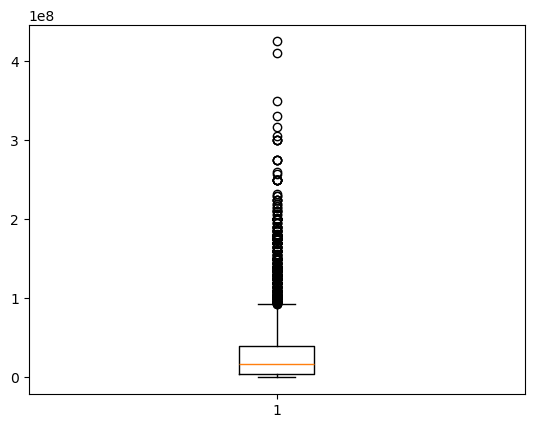

In [20]:
plt.boxplot(movie_budget_df['production_budget'])
plt.show()

In [21]:
# We'll check the columns in movie_gross_df
print(movie_gross_df.columns)

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')


In [22]:
# Check if genres is in movies_df
print(movies_df.columns)

Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')


In [23]:
print(movie_budget_df.columns)

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')


In [24]:
# Merging on the 'movie' column from movie_budget and the 'title' column from movie_gross
merged_df = pd.merge(movie_budget_df, movie_gross_df, left_on='movie', right_on='title', how='inner')

# Check the first few rows of the merged DataFrame
merged_df.head(5)

,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,title,studio,domestic_gross_y,foreign_gross,year
0,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,Pirates of the Caribbean: On Stranger Tides,BV,241100000.0,804600000.0,2011
1,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015
2,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,Avengers: Infinity War,BV,678800000.0,1369.5,2018
3,9,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,Justice League,WB,229000000.0,428900000.0,2017
4,10,2015-11-06,Spectre,300000000.0,200074175.0,8.796209e+08,Spectre,Sony,200100000.0,680600000.0,2015


We want to visualize multiple factors, like comparing budget vs both domestic gross and foreign gross. A scatter plot will work well here

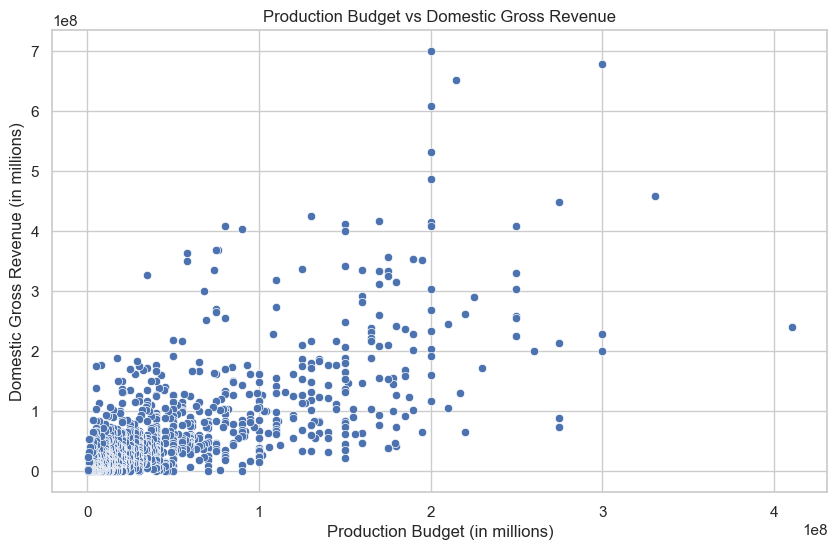

In [25]:

# Set the style for the plots
sns.set(style="whitegrid")

# Scatter plot to visualize the relationship between production_budget and domestic gross
plt.figure(figsize=(10, 6))
sns.scatterplot(x='production_budget', y='domestic_gross_y', data=merged_df)

# Add labels and title
plt.title('Production Budget vs Domestic Gross Revenue')
plt.xlabel('Production Budget (in millions)')
plt.ylabel('Domestic Gross Revenue (in millions)')

# Show the plot
plt.show()


<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Nick\AppData\Local\Temp\ipykernel_17472\3481985279.py:2: SyntaxWarning: invalid escape sequence '\$'
  merged_df['domestic_gross_x'] = merged_df['domestic_gross_x'].replace({'\$': '', ',': ''}, regex=True).astype(float)
C:\Users\Nick\AppData\Local\Temp\ipykernel_17472\3481985279.py:3: SyntaxWarning: invalid escape sequence '\$'
  merged_df['worldwide_gross'] = merged_df['worldwide_gross'].replace({'\$': '', ',': ''}, regex=True).astype(float)


   domestic_gross_x  worldwide_gross
0       241063875.0     1.045664e+09
1       459005868.0     1.403014e+09
2       678815482.0     2.048134e+09
3       229024295.0     6.559452e+08
4       200074175.0     8.796209e+08


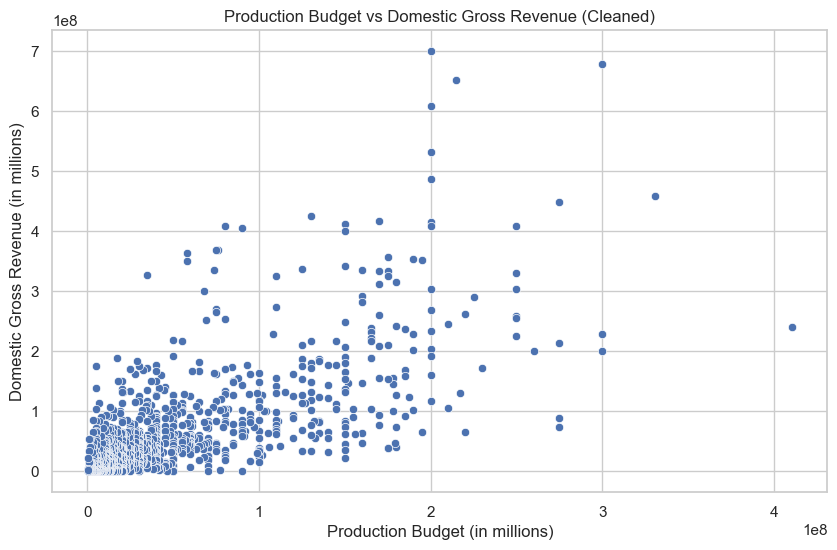

In [26]:
# Remove '$' and ',' from domestic_gross_x and worldwide_gross and convert them to numeric
merged_df['domestic_gross_x'] = merged_df['domestic_gross_x'].replace({'\$': '', ',': ''}, regex=True).astype(float)
merged_df['worldwide_gross'] = merged_df['worldwide_gross'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Check if the cleaning worked
print(merged_df[['domestic_gross_x', 'worldwide_gross']].head())

# Now create a scatter plot using domestic_gross_x
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Scatter plot to visualize the relationship between production_budget and cleaned domestic_gross_x
plt.figure(figsize=(10, 6))
sns.scatterplot(x='production_budget', y='domestic_gross_x', data=merged_df)

# Add labels and title
plt.title('Production Budget vs Domestic Gross Revenue (Cleaned)')
plt.xlabel('Production Budget (in millions)')
plt.ylabel('Domestic Gross Revenue (in millions)')

# Show the plot
plt.show()


In [27]:
# Assuming 'movie_df' and 'movie_budget_df' are your two DataFrames

merged_df1 = pd.merge(movies_df, movie_budget_df, left_on='title', right_on='movie', how='inner')

# Display the first few rows to check the merge
merged_df1.head()


,Unnamed: 0,genre_ids,id_x,original_language,original_title,popularity,release_date_x,title,vote_average,vote_count,id_y,release_date_y,movie,production_budget,domestic_gross,worldwide_gross
0,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,30,2010-03-26,How to Train Your Dragon,165000000.0,217581232.0,494870992.0
1,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,15,2010-05-07,Iron Man 2,170000000.0,312433331.0,621156389.0
2,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,37,1995-11-22,Toy Story,30000000.0,191796233.0,364545516.0
3,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,38,2010-07-16,Inception,160000000.0,292576195.0,835524642.0
4,5,"[12, 14, 10751]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229,17,2010-02-12,Percy Jackson & the Olympians: The Lightning T...,95000000.0,88768303.0,223050874.0


In [28]:
# Convert the release_date_x to datetime (it seems to be in 'YYYY-MM-DD' format)
merged_df1['release_date_x'] = pd.to_datetime(merged_df1['release_date_x'], errors='coerce')

# Extract the year from the datetime column
merged_df1['year'] = merged_df1['release_date_x'].dt.year

# Verify if the 'year' column was created successfully
print(merged_df1[['title', 'release_date_x', 'year']].head())


                                               title release_date_x  year
0                           How to Train Your Dragon     2010-03-26  2010
1                                         Iron Man 2     2010-05-07  2010
2                                          Toy Story     1995-11-22  1995
3                                          Inception     2010-07-16  2010
4  Percy Jackson & the Olympians: The Lightning T...     2010-02-11  2010


C:\Users\Nick\AppData\Local\Temp\ipykernel_17472\1759428243.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=merged_df1, x='production_budget', y='worldwide_gross', palette='coolwarm')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


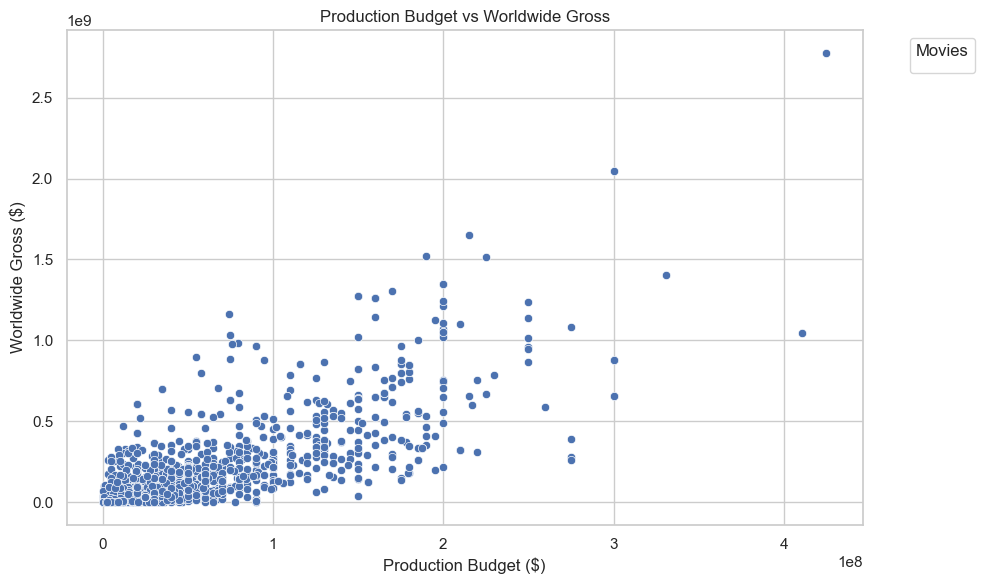

C:\Users\Nick\AppData\Local\Temp\ipykernel_17472\1759428243.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_movies, x='title', y='production_budget', palette='viridis')


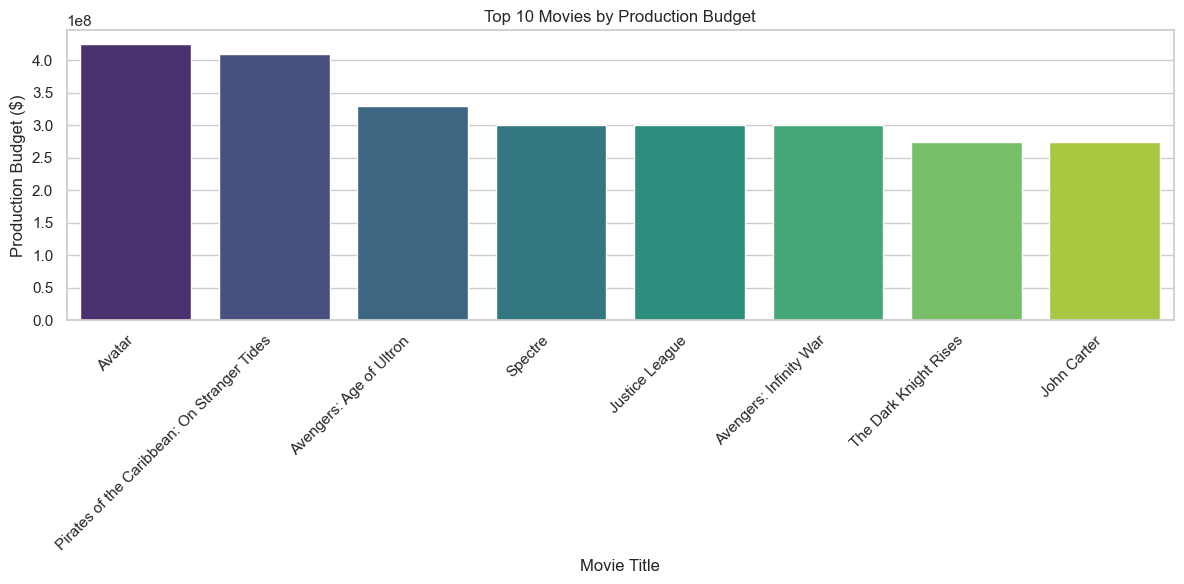

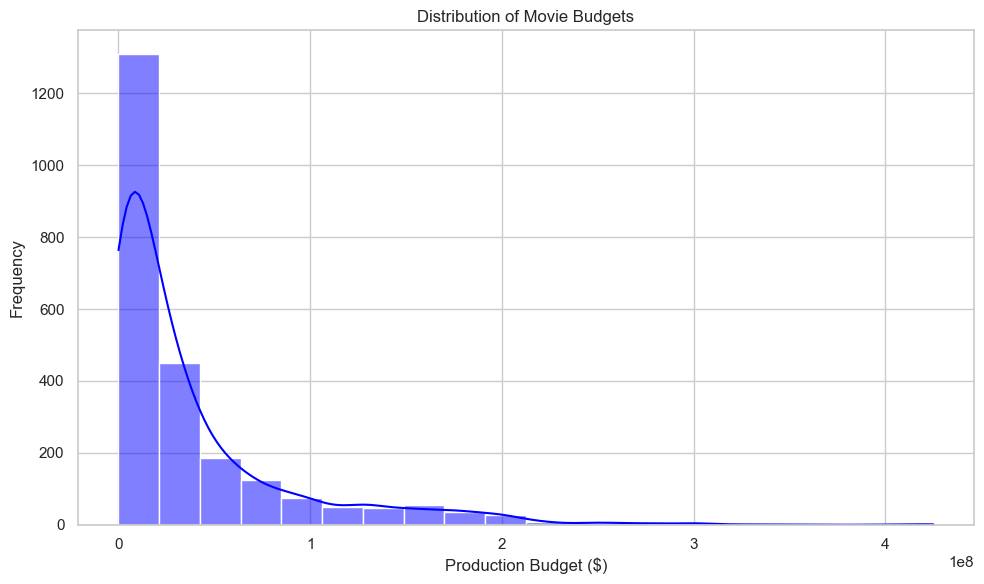

In [29]:

# Assuming 'merged_df1' contains 'title', 'production_budget', and 'worldwide_gross'

# 1. Scatter Plot: Production Budget vs Worldwide Gross
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df1, x='production_budget', y='worldwide_gross', palette='coolwarm')
plt.title('Production Budget vs Worldwide Gross')
plt.xlabel('Production Budget ($)')
plt.ylabel('Worldwide Gross ($)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Movies')
plt.tight_layout()
plt.show()

# 2. Bar Chart: Top 10 Movies by Production Budget
top10_movies = merged_df1.nlargest(10, 'production_budget')

plt.figure(figsize=(12, 6))
sns.barplot(data=top10_movies, x='title', y='production_budget', palette='viridis')
plt.title('Top 10 Movies by Production Budget')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Movie Title')
plt.ylabel('Production Budget ($)')
plt.tight_layout()
plt.show()

# 3. Histogram: Distribution of Movie Budgets
plt.figure(figsize=(10, 6))
sns.histplot(merged_df1['production_budget'], bins=20, kde=True, color='blue')
plt.title('Distribution of Movie Budgets')
plt.xlabel('Production Budget ($)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()



1. Scatter Plot: It shows how production budget correlates with worldwide gross revenue. 
2. Bar Chart: The bar chart compares the production budgets of the top 10 movies with the largest budgets.
3. Histogram: The histogram provides an overview of the distribution of production budgets for all movies in the dataset.

# Which studios consistently produce the most successful films

## To determine which movie studios consistently produce the most successful films, we'll group the data by studio, summing the domestic and foreign gross revenues. We'll then visualize the top-performing studios using bar plots for better insights

In [30]:
# Group by studio and sum the domestic and foreign gross
studio_performance = movie_gross_df.groupby('studio')[['domestic_gross', 'foreign_gross']].sum()

# Calculate total gross by adding domestic and foreign gross
studio_performance['total_gross'] = studio_performance['domestic_gross'] + studio_performance['foreign_gross']

# Sort the studios by total gross in descending order
top_studios = studio_performance.sort_values('total_gross', ascending=False).head(10)



In [31]:
print(top_studios)

         domestic_gross  foreign_gross   total_gross
studio                                              
BV         1.839653e+10   2.579385e+10  4.419038e+10
Fox        1.092450e+10   2.005587e+10  3.098037e+10
WB         1.212360e+10   1.866790e+10  3.079150e+10
Uni.       1.289204e+10   1.685477e+10  2.974681e+10
Sony       8.459479e+09   1.394524e+10  2.240472e+10
Par.       7.580813e+09   1.186338e+10  1.944420e+10
WB (NL)    3.975100e+09   6.339000e+09  1.031410e+10
LGF        3.991851e+09   4.475619e+09  8.467471e+09
LG/S       1.965200e+09   3.353724e+09  5.318924e+09
P/DW       1.682900e+09   3.393600e+09  5.076500e+09


In [32]:
# For easier plotting we weill use this code
top_studios = top_studios.reset_index()

C:\Users\Nick\AppData\Local\Temp\ipykernel_17472\2655852769.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='domestic_gross', y='studio', data=top_studios, palette='Blues_d')
C:\Users\Nick\AppData\Local\Temp\ipykernel_17472\2655852769.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='foreign_gross', y='studio', data=top_studios, palette='Greens_d')
C:\Users\Nick\AppData\Local\Temp\ipykernel_17472\2655852769.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_gross', y='studio', data=top_studios, palette='Reds_d')


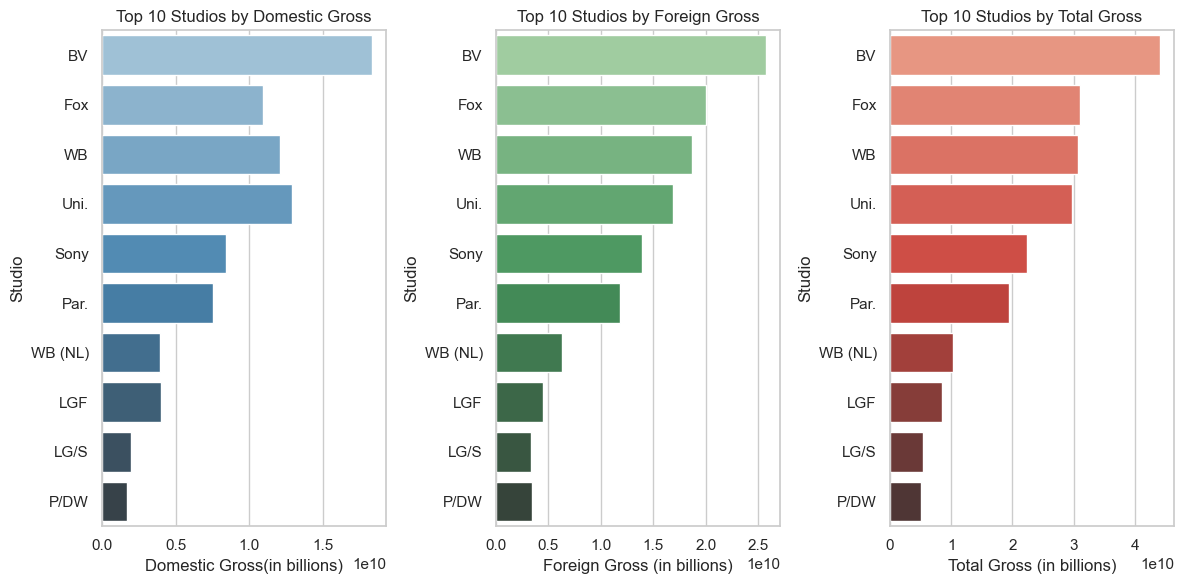

In [33]:
# We will visualize the top 10 studios based on domestic, foreign and total gross
plt.figure(figsize=(12, 6))

# Plot for domestic gross
plt.subplot(1, 3, 1)
sns.barplot(x='domestic_gross', y='studio', data=top_studios, palette='Blues_d')
plt.title('Top 10 Studios by Domestic Gross')
plt.xlabel('Domestic Gross(in billions)')
plt.ylabel('Studio')

# Plot for foreign gross
plt.subplot(1, 3, 2)
sns.barplot(x='foreign_gross', y='studio', data=top_studios, palette='Greens_d')
plt.title('Top 10 Studios by Foreign Gross')
plt.xlabel('Foreign Gross (in billions)')
plt.ylabel('Studio')

# Plot for total gross
plt.subplot(1, 3, 3)
sns.barplot(x='total_gross', y='studio', data=top_studios, palette='Reds_d')
plt.title('Top 10 Studios by Total Gross')
plt.xlabel('Total Gross (in billions)')
plt.ylabel('Studio')

plt.tight_layout()
plt.show()

## Conclusion:

From the visualization above, we can see that BV (Buena Vista), Fox and Warner Bros.(WB) consistently dominate across all categories of gross revenue - domestic, foreign and total. BV is the clear leader, followed by Fox and WB, with Universal and Sony also performing well.

## Recommendation:

The data suggests that partnering with studios like Buena Vista, Fox and Warner Bros. can maximize box office success, as they have a track record of producing high-grossing films both domestically and internationally.

# Statistical Analysis

## 1. Descriptive Analysis

We will use key metrics such as production_budget, domestic_gross, worldwide_gross and to understand their central tendancies and dispersion.

In [34]:
# We will summarize the statistics for the key financial variables. we will name it summary_stats.
financial_columns = ['production_budget', 'domestic_gross', 'worldwide_gross']

summary_stats = movie_budget_df[financial_columns].describe()

print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
       production_budget  domestic_gross  worldwide_gross
count       5.782000e+03    5.782000e+03     5.782000e+03
mean        3.158776e+07    4.187333e+07     9.148746e+07
std         4.181208e+07    6.824060e+07     1.747200e+08
min         1.100000e+03    0.000000e+00     0.000000e+00
25%         5.000000e+06    1.429534e+06     4.125415e+06
50%         1.700000e+07    1.722594e+07     2.798445e+07
75%         4.000000e+07    5.234866e+07     9.764584e+07
max         4.250000e+08    9.366622e+08     2.776345e+09


## 2. Correlation Analysis

We will now analyze the relationship between production_budget, domestic_gross, and worldwide_gross. so as to help us identify any strong linear relationships between the variables

Correlation Matrix:
                   production_budget  domestic_gross  worldwide_gross
production_budget           1.000000        0.685682         0.748306
domestic_gross              0.685682        1.000000         0.938853
worldwide_gross             0.748306        0.938853         1.000000


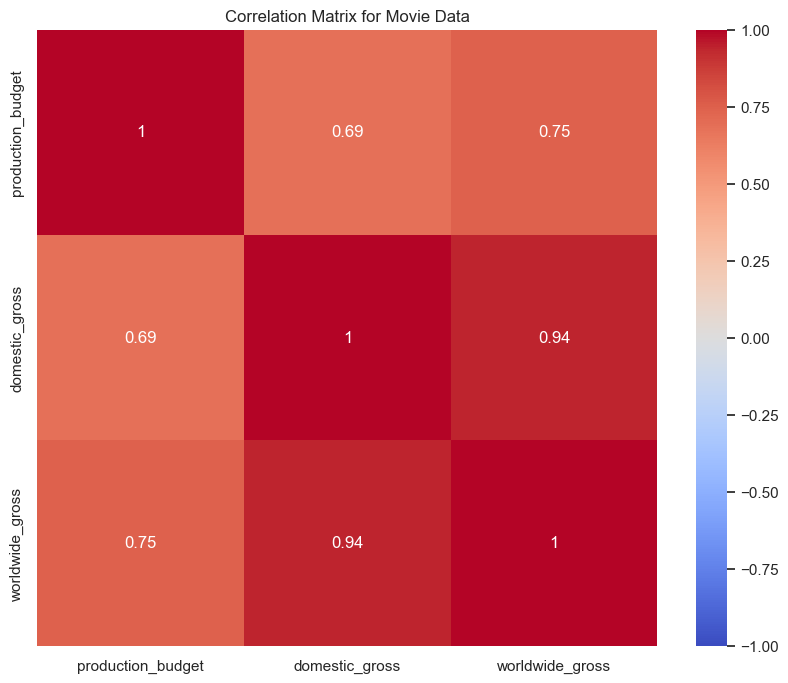

In [35]:
# Calculate the correlation matrix for the budget and gross.
correlation_matrix = movie_budget_df[financial_columns].corr()

print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap.
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix for Movie Data")
plt.show()

## 3. Hypothesis Testing


"Movies with higher popularity scores perform significantly better in terms of total gross than less popular movies". We can test out this hypothesis.

Hypothesis:
Null Hypothesis: There is no difference in total gross between high and low popularity movies.
Alternative Hypothesis: High popularity movies have a higher totak gross.

In [36]:
movies_df.columns

Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [37]:
movie_budget_df.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

In [38]:
movies_df.head(10)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
5,5,"[12, 14, 10751]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229
6,6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676
7,7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340
8,8,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057
9,9,"[16, 28, 35, 10751, 878]",38055,en,Megamind,22.855,2010-11-04,Megamind,6.8,3635
